<a href="https://colab.research.google.com/github/Moutaz-Code/CancerModelColab/blob/main/Data_Mining_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [216]:
from google.colab import drive

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import kagglehub
import os


# Read the Dataset and store it in DATA

In [217]:
path_to_directory = kagglehub.dataset_download("zahidmughal2343/global-cancer-patients-2015-2024")

file_path = os.path.join(path_to_directory, 'global_cancer_patients_2015_2024.csv')

originalDATA = pd.read_csv(file_path)
modifiedDATA = originalDATA #this is what we will edit and change

# ***DATA Splitting***
---

In [218]:
# prompt:  modifiedDATA has 50000 records, make it only 5000, but also make sure to use well distributed and balnced splitting

modifiedDATA = modifiedDATA.sample(n=10000, random_state=42).reset_index(drop=True)
# The .sample(n=5000, random_state=42) line randomly selects 5000 rows from the modifiedDATA DataFrame.
# Using a fixed random_state ensures reproducibility of the sampling.
# .reset_index(drop=True) resets the DataFrame index after sampling to have a clean 0-based index.

# Explore the Dataset

In [219]:
modifiedDATA

,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
0,PT0033553,63,Male,Australia,2023,8.5,0.8,7.6,8.4,6.9,Prostate,Stage I,5410.15,2.7,7.22
1,PT0009427,64,Other,India,2021,6.8,1.9,3.1,2.4,6.4,Cervical,Stage I,61107.99,0.9,4.01
2,PT0000199,79,Female,Germany,2019,9.4,5.0,4.9,8.4,2.7,Colon,Stage I,62954.82,2.6,6.06
3,PT0012447,56,Other,Germany,2019,5.9,7.5,6.5,0.5,7.5,Liver,Stage 0,61428.40,3.3,4.90
4,PT0039489,41,Male,Germany,2023,4.0,4.4,3.4,7.9,7.6,Skin,Stage II,45867.76,9.3,5.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,PT0028567,36,Other,Pakistan,2018,4.2,5.0,3.0,2.7,0.0,Prostate,Stage II,51005.07,6.2,3.56
9996,PT0025079,73,Male,Germany,2019,6.6,2.3,7.8,2.7,2.3,Skin,Stage III,63848.25,4.0,4.33
9997,PT0018707,23,Other,Canada,2021,1.5,5.5,0.1,3.4,5.7,Liver,Stage 0,56604.03,5.1,3.26
9998,PT0015200,77,Other,UK,2016,5.7,4.6,2.0,1.7,4.5,Breast,Stage II,80782.84,0.9,3.30


In [220]:
# No null values
modifiedDATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Patient_ID             10000 non-null  object 
 1   Age                    10000 non-null  int64  
 2   Gender                 10000 non-null  object 
 3   Country_Region         10000 non-null  object 
 4   Year                   10000 non-null  int64  
 5   Genetic_Risk           10000 non-null  float64
 6   Air_Pollution          10000 non-null  float64
 7   Alcohol_Use            10000 non-null  float64
 8   Smoking                10000 non-null  float64
 9   Obesity_Level          10000 non-null  float64
 10  Cancer_Type            10000 non-null  object 
 11  Cancer_Stage           10000 non-null  object 
 12  Treatment_Cost_USD     10000 non-null  float64
 13  Survival_Years         10000 non-null  float64
 14  Target_Severity_Score  10000 non-null  float64
dtypes: 

In [221]:
# mean vary significanlty between each attribute ==> Normalization is NEEDED!!!
# std not very high. Suggesting the distribution is good in each attribute
modifiedDATA.describe()

,Age,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,54.500600,2019.454700,4.983190,5.037670,4.991180,4.972860,4.978390,52613.848443,5.053290,4.941061
std,20.178149,2.857125,2.891457,2.909286,2.862019,2.879288,2.896823,27608.242504,2.884821,1.192061
min,20.000000,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5006.490000,0.000000,0.900000
25%,37.000000,2017.000000,2.500000,2.500000,2.600000,2.500000,2.500000,28306.930000,2.600000,4.120000
50%,55.000000,2019.000000,5.000000,5.100000,5.000000,5.000000,5.000000,53055.080000,5.100000,4.940000
75%,72.000000,2022.000000,7.500000,7.600000,7.500000,7.400000,7.500000,76767.602500,7.500000,5.770000
max,89.000000,2024.000000,10.000000,10.000000,10.000000,10.000000,10.000000,99978.250000,10.000000,8.810000


In [222]:
# DATA DataFrame does not contain any duplicate rows
modifiedDATA.duplicated().sum()

np.int64(0)

# ***ENCODING***


---

*   **Gender** ==> label encoding (0, 1)
*   **Years** ==> Ordinal Encoding (not necessary as it is integer)
*   **Country_Region** ==> label encoding (0, 1, 2, .....)
*   **Cancer_type** ==> one-hot encoding
*   **Cancer_stage** ==> ordinal encoding
⚗


In [223]:
# Gender ==> label encoding (0, 1) (Female, Male)

le = LabelEncoder()
modifiedDATA['Gender'] = le.fit_transform(modifiedDATA['Gender'])

In [224]:
# Cancer_Type ==> one-hot encoding

ohe = OneHotEncoder(handle_unknown='ignore')
cancer_type_encoded = ohe.fit_transform(modifiedDATA[['Cancer_Type']]).toarray()
cancer_type_df = pd.DataFrame(cancer_type_encoded, columns=ohe.get_feature_names_out(['Cancer_Type']))
modifiedDATA = pd.concat([modifiedDATA.drop('Cancer_Type', axis=1), cancer_type_df], axis=1)

In [225]:
#Country_Region ==> label encoding (0, 1, 2, .....)

le = LabelEncoder()
modifiedDATA['Country_Region'] = le.fit_transform(modifiedDATA['Country_Region'])

In [226]:
# Cancer_Stage ==> ordinal encoding ⚗

ord = OrdinalEncoder()
modifiedDATA['Cancer_Stage'] = ord.fit_transform(modifiedDATA[['Cancer_Stage']])

In [227]:
modifiedDATA

,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,...,Survival_Years,Target_Severity_Score,Cancer_Type_Breast,Cancer_Type_Cervical,Cancer_Type_Colon,Cancer_Type_Leukemia,Cancer_Type_Liver,Cancer_Type_Lung,Cancer_Type_Prostate,Cancer_Type_Skin
0,PT0033553,63,1,0,2023,8.5,0.8,7.6,8.4,6.9,...,2.7,7.22,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,PT0009427,64,2,5,2021,6.8,1.9,3.1,2.4,6.4,...,0.9,4.01,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,PT0000199,79,0,4,2019,9.4,5.0,4.9,8.4,2.7,...,2.6,6.06,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,PT0012447,56,2,4,2019,5.9,7.5,6.5,0.5,7.5,...,3.3,4.90,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,PT0039489,41,1,4,2023,4.0,4.4,3.4,7.9,7.6,...,9.3,5.39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,PT0028567,36,2,6,2018,4.2,5.0,3.0,2.7,0.0,...,6.2,3.56,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9996,PT0025079,73,1,4,2019,6.6,2.3,7.8,2.7,2.3,...,4.0,4.33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9997,PT0018707,23,2,2,2021,1.5,5.5,0.1,3.4,5.7,...,5.1,3.26,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9998,PT0015200,77,2,8,2016,5.7,4.6,2.0,1.7,4.5,...,0.9,3.30,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# ***FEATURE SELECTION***
---


*   Drop Patient ID
*   Investigate what other attributes to be dropped using some techniques, e.g, information gain



In [228]:
# prompt: from DATA datafrom, drop the Patient_ID

modifiedDATA = modifiedDATA.drop('Patient_ID', axis=1)

In [229]:
modifiedDATA

,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Stage,...,Survival_Years,Target_Severity_Score,Cancer_Type_Breast,Cancer_Type_Cervical,Cancer_Type_Colon,Cancer_Type_Leukemia,Cancer_Type_Liver,Cancer_Type_Lung,Cancer_Type_Prostate,Cancer_Type_Skin
0,63,1,0,2023,8.5,0.8,7.6,8.4,6.9,1.0,...,2.7,7.22,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,64,2,5,2021,6.8,1.9,3.1,2.4,6.4,1.0,...,0.9,4.01,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,79,0,4,2019,9.4,5.0,4.9,8.4,2.7,1.0,...,2.6,6.06,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,56,2,4,2019,5.9,7.5,6.5,0.5,7.5,0.0,...,3.3,4.90,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,41,1,4,2023,4.0,4.4,3.4,7.9,7.6,2.0,...,9.3,5.39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,36,2,6,2018,4.2,5.0,3.0,2.7,0.0,2.0,...,6.2,3.56,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9996,73,1,4,2019,6.6,2.3,7.8,2.7,2.3,3.0,...,4.0,4.33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9997,23,2,2,2021,1.5,5.5,0.1,3.4,5.7,0.0,...,5.1,3.26,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9998,77,2,8,2016,5.7,4.6,2.0,1.7,4.5,2.0,...,0.9,3.30,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Correlation with Severity_Score:
Target_Severity_Score    1.000000
Smoking                  0.483509
Genetic_Risk             0.476746
Air_Pollution            0.370324
Alcohol_Use              0.351275
Obesity_Level            0.253784
Gender                   0.017331
Cancer_Type_Leukemia     0.016196
Cancer_Type_Skin         0.008125
Country_Region           0.006076
Cancer_Type_Lung         0.004995
Cancer_Type_Liver        0.004811
Survival_Years           0.002569
Year                     0.002013
Cancer_Type_Prostate    -0.002058
Cancer_Stage            -0.002058
Cancer_Type_Breast      -0.003996
Cancer_Type_Cervical    -0.009199
Age                     -0.013469
Cancer_Type_Colon       -0.018534
Treatment_Cost_USD      -0.456356
Name: Target_Severity_Score, dtype: float64


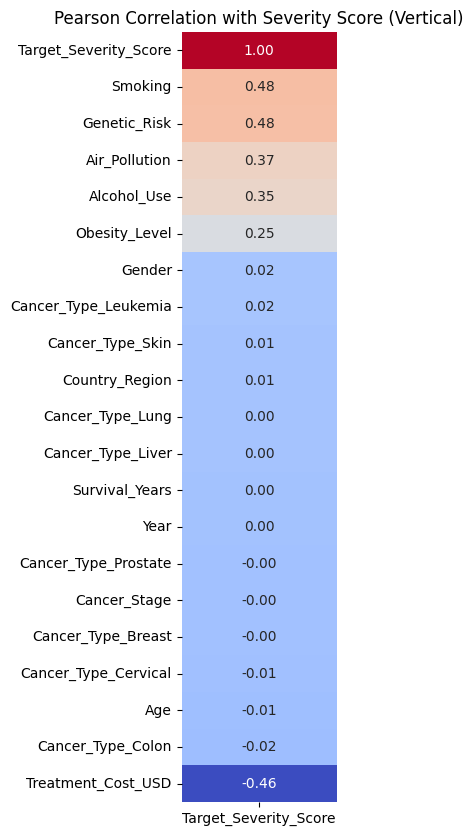

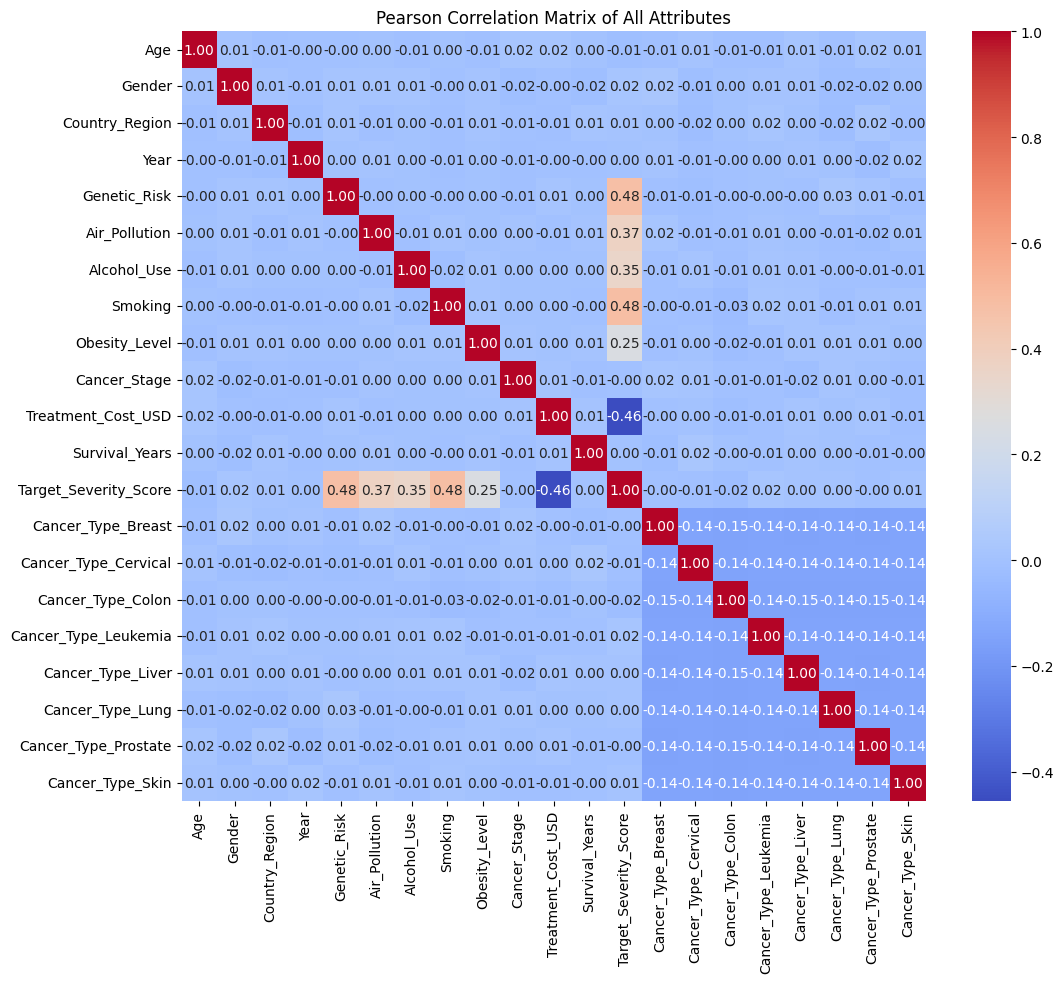

In [230]:
# prompt: # prompt: I want a 1 dimensional array print and 1d pearson's heatmap (vertical) for attributes against target severity score, and a 2d heatmap with all attributes against each other

# Calculate the correlation matrix
correlation_matrix = modifiedDATA.corr()

# Get the correlation of all attributes with the target variable ('Severity_Score')
correlation_with_target = modifiedDATA.corr()['Target_Severity_Score'].sort_values(ascending=False)

# Print the 1D array of correlations with Severity_Score
print("Correlation with Severity_Score:")
print(correlation_with_target)

# Create a 1D vertical heatmap for correlations with Severity_Score
plt.figure(figsize=(2, 10)) # Adjust figure size for a vertical heatmap
sns.heatmap(correlation_with_target.to_frame(), annot=True, cmap='coolwarm', fmt=".2f", cbar=False)
plt.title('Pearson Correlation with Severity Score (Vertical)')
plt.yticks(rotation=0) # Keep y-axis labels horizontal
plt.show()

# Create a 2D heatmap of all attributes against each other
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pearson Correlation Matrix of All Attributes')
plt.show()


In [231]:
# prompt: I want other feature selection methods, other than pearson's correlation

from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif

# Assuming 'Target_Severity_Score' is the target variable
X = modifiedDATA.drop('Target_Severity_Score', axis=1)
y = modifiedDATA['Target_Severity_Score']

# --- Using ANOVA F-value ---
# Select features based on the ANOVA F-value between each feature and the target
# Use f_classif for classification tasks. If 'Target_Severity_Score' was continuous,
# you would use f_regression. Given the task description, it seems more likely to be a regression task,
# but since the previous code used 'Severity_Score', which often implies classification or a scoring system,
# and f_classif is suitable for discrete targets, let's assume it's a classification-like problem for demonstration.
# If 'Target_Severity_Score' is truly continuous, replace f_classif with f_regression.

# Install if not already installed
!pip install scipy
!pip install scikit-learn

from sklearn.feature_selection import f_regression # Import f_regression

# Check the data type of the target variable to decide between f_classif and f_regression
if pd.api.types.is_numeric_dtype(y):
    # Treat as regression if numeric
    k_best_anova = SelectKBest(score_func=f_regression, k='all')
else:
    # Treat as classification if not numeric (e.g., discrete categories)
     k_best_anova = SelectKBest(score_func=f_classif, k='all')


k_best_anova.fit(X, y)

# Get scores and p-values
anova_scores = pd.DataFrame({'Feature': X.columns, 'ANOVA_Score': k_best_anova.scores_})

# Handle potential NaNs in p-values if using f_classif with certain data
# If using f_regression, pvalues might be more reliably calculated.
# If using f_classif, check if k_best_anova.pvalues_ exists and handle NaNs if needed.
# For simplicity here, we'll primarily focus on the scores.

# Sort by score
anova_scores = anova_scores.sort_values(by='ANOVA_Score', ascending=False)

print("\nFeatures ranked by ANOVA F-value:")
print(anova_scores)

# --- Using Mutual Information ---
# Select features based on mutual information between each feature and the target
# Suitable for both numerical and categorical features, and can capture non-linear relationships.
# Note: mutual_info_classif is for discrete targets, mutual_info_regression is for continuous targets.
# Again, checking the target type to choose the appropriate function.

# Install if not already installed
!pip install scikit-learn

from sklearn.feature_selection import mutual_info_regression # Import mutual_info_regression

if pd.api.types.is_numeric_dtype(y):
    # Treat as regression if numeric
    selector_mi = SelectKBest(score_func=mutual_info_regression, k='all')
else:
    # Treat as classification if not numeric
    selector_mi = SelectKBest(score_func=mutual_info_classif, k='all')

selector_mi.fit(X, y)

# Get scores
mi_scores = pd.DataFrame({'Feature': X.columns, 'Mutual_Information_Score': selector_mi.scores_})

# Sort by score
mi_scores = mi_scores.sort_values(by='Mutual_Information_Score', ascending=False)

print("\nFeatures ranked by Mutual Information:")
print(mi_scores)

# You can use these rankings to select the top K features based on ANOVA or Mutual Information scores.
# For example, to get the top 5 features based on Mutual Information:
top_5_mi_features = mi_scores['Feature'].head(5).tolist()
print(f"\nTop 5 features based on Mutual Information: {top_5_mi_features}")


Features ranked by ANOVA F-value:
                 Feature  ANOVA_Score
7                Smoking  3050.485265
4           Genetic_Risk  2940.821877
10    Treatment_Cost_USD  2629.893852
5          Air_Pollution  1589.046323
6            Alcohol_Use  1407.357409
8          Obesity_Level   688.261572
14     Cancer_Type_Colon     3.435450
1                 Gender     3.004039
15  Cancer_Type_Leukemia     2.623136
0                    Age     1.814047
13  Cancer_Type_Cervical     0.846102
19      Cancer_Type_Skin     0.660038
2         Country_Region     0.369074
17      Cancer_Type_Lung     0.249448
16     Cancer_Type_Liver     0.231417
12    Cancer_Type_Breast     0.159681
11        Survival_Years     0.065981
9           Cancer_Stage     0.042358
18  Cancer_Type_Prostate     0.042354
3                   Year     0.040517

Features ranked by Mutual Information:
                 Feature  Mutual_Information_Score
4           Genetic_Risk                  0.131759
7                Smoking 

# ***DROP IRRELEVANT***
---

In [232]:
# Prepare X and y
X = modifiedDATA.drop('Target_Severity_Score', axis=1)
y = modifiedDATA['Target_Severity_Score']

# Perform ANOVA F-test for regression
selector = SelectKBest(score_func=f_regression, k='all')
selector.fit(X, y)

# Get scores
anova_scores = pd.DataFrame({
    'Feature': X.columns,
    'ANOVA_Score': selector.scores_
})

# Filter features with ANOVA score >= 0.01
selected_features = anova_scores[anova_scores['ANOVA_Score'] > 0.25]['Feature'].tolist()

# Create new DataFrame with selected features + target
anova_filtered_data = modifiedDATA[selected_features + ['Target_Severity_Score']]

# Display the selected features
print("Selected features with ANOVA score >= 0.01:")
print(selected_features)
# Identify and print dropped features
dropped_features = set(X.columns) - set(selected_features)
print("Dropped features:")
print(dropped_features)

Selected features with ANOVA score >= 0.01:
['Age', 'Gender', 'Country_Region', 'Genetic_Risk', 'Air_Pollution', 'Alcohol_Use', 'Smoking', 'Obesity_Level', 'Treatment_Cost_USD', 'Cancer_Type_Cervical', 'Cancer_Type_Colon', 'Cancer_Type_Leukemia', 'Cancer_Type_Skin']
Dropped features:
{'Survival_Years', 'Year', 'Cancer_Type_Lung', 'Cancer_Stage', 'Cancer_Type_Prostate', 'Cancer_Type_Breast', 'Cancer_Type_Liver'}


In [233]:
anova_filtered_data

,Age,Gender,Country_Region,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Treatment_Cost_USD,Cancer_Type_Cervical,Cancer_Type_Colon,Cancer_Type_Leukemia,Cancer_Type_Skin,Target_Severity_Score
0,63,1,0,8.5,0.8,7.6,8.4,6.9,5410.15,0.0,0.0,0.0,0.0,7.22
1,64,2,5,6.8,1.9,3.1,2.4,6.4,61107.99,1.0,0.0,0.0,0.0,4.01
2,79,0,4,9.4,5.0,4.9,8.4,2.7,62954.82,0.0,1.0,0.0,0.0,6.06
3,56,2,4,5.9,7.5,6.5,0.5,7.5,61428.40,0.0,0.0,0.0,0.0,4.90
4,41,1,4,4.0,4.4,3.4,7.9,7.6,45867.76,0.0,0.0,0.0,1.0,5.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,36,2,6,4.2,5.0,3.0,2.7,0.0,51005.07,0.0,0.0,0.0,0.0,3.56
9996,73,1,4,6.6,2.3,7.8,2.7,2.3,63848.25,0.0,0.0,0.0,1.0,4.33
9997,23,2,2,1.5,5.5,0.1,3.4,5.7,56604.03,0.0,0.0,0.0,0.0,3.26
9998,77,2,8,5.7,4.6,2.0,1.7,4.5,80782.84,0.0,0.0,0.0,0.0,3.30


In [234]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),

}

def evaluate_models(X, y, models):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    results = []
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        results.append({
            "Model": name,
            "MAE": mean_absolute_error(y_test, y_pred),
            "MSE": mean_squared_error(y_test, y_pred),
            "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
            "R2": r2_score(y_test, y_pred)
        })
    return pd.DataFrame(results)

# Evaluate on modifiedDATA
print("Evaluating models on modifiedDATA:")
X_modified = modifiedDATA.drop('Target_Severity_Score', axis=1)
y_modified = modifiedDATA['Target_Severity_Score']
modified_results = evaluate_models(X_modified, y_modified, models)
print(modified_results)

print("\n" + "="*50 + "\n")

# Evaluate on feature_selected_data
print("Evaluating models on feature_selected_data:")
X_selected = anova_filtered_data.drop('Target_Severity_Score', axis=1)
y_selected = anova_filtered_data['Target_Severity_Score']
selected_results = evaluate_models(X_selected, y_selected, models)
print(selected_results)

Evaluating models on modifiedDATA:
               Model       MAE       MSE      RMSE        R2
0  Linear Regression  0.002492  0.000008  0.002886  0.999994
1      Decision Tree  0.393630  0.245412  0.495391  0.821157
2      Random Forest  0.198109  0.061322  0.247632  0.955312
3  Gradient Boosting  0.112321  0.019834  0.140832  0.985546


Evaluating models on feature_selected_data:
               Model       MAE       MSE      RMSE        R2
0  Linear Regression  0.002490  0.000008  0.002885  0.999994
1      Decision Tree  0.381230  0.232313  0.481989  0.830703
2      Random Forest  0.188678  0.055874  0.236377  0.959282
3  Gradient Boosting  0.112321  0.019834  0.140832  0.985546


In [235]:
# Step 1: Calculate IQR for the target column
Q1 = anova_filtered_data['Target_Severity_Score'].quantile(0.25)
Q3 = anova_filtered_data['Target_Severity_Score'].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Filter out the outliers in the target column
no_outliers = anova_filtered_data[
    (anova_filtered_data['Target_Severity_Score'] >= lower_bound) &
    (anova_filtered_data['Target_Severity_Score'] <= upper_bound)
]

# Step 4: Optionally, check how many rows were removed
print(f"Original rows: {len(anova_filtered_data)}")
print(f"Rows after outlier removal: {len(no_outliers)}")



Original rows: 10000
Rows after outlier removal: 9970


In [236]:
no_outliers

,Age,Gender,Country_Region,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Treatment_Cost_USD,Cancer_Type_Cervical,Cancer_Type_Colon,Cancer_Type_Leukemia,Cancer_Type_Skin,Target_Severity_Score
0,63,1,0,8.5,0.8,7.6,8.4,6.9,5410.15,0.0,0.0,0.0,0.0,7.22
1,64,2,5,6.8,1.9,3.1,2.4,6.4,61107.99,1.0,0.0,0.0,0.0,4.01
2,79,0,4,9.4,5.0,4.9,8.4,2.7,62954.82,0.0,1.0,0.0,0.0,6.06
3,56,2,4,5.9,7.5,6.5,0.5,7.5,61428.40,0.0,0.0,0.0,0.0,4.90
4,41,1,4,4.0,4.4,3.4,7.9,7.6,45867.76,0.0,0.0,0.0,1.0,5.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,36,2,6,4.2,5.0,3.0,2.7,0.0,51005.07,0.0,0.0,0.0,0.0,3.56
9996,73,1,4,6.6,2.3,7.8,2.7,2.3,63848.25,0.0,0.0,0.0,1.0,4.33
9997,23,2,2,1.5,5.5,0.1,3.4,5.7,56604.03,0.0,0.0,0.0,0.0,3.26
9998,77,2,8,5.7,4.6,2.0,1.7,4.5,80782.84,0.0,0.0,0.0,0.0,3.30


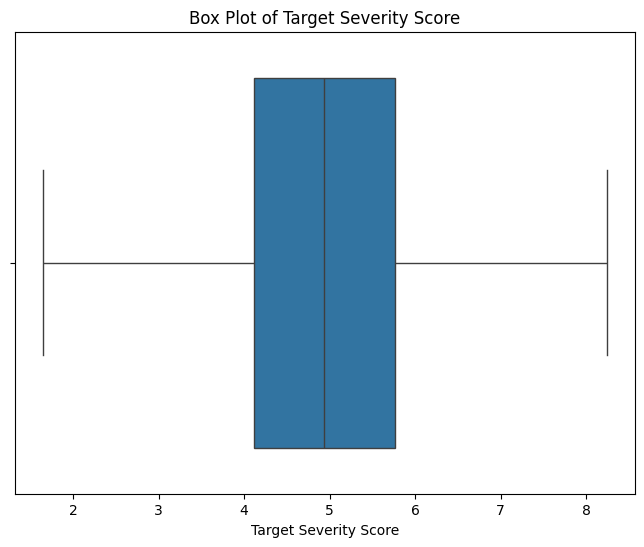

In [237]:
# prompt: do the box plot for the target attribute

# Do the box plot for the target attribute
plt.figure(figsize=(8, 6))
sns.boxplot(x=no_outliers['Target_Severity_Score'])
plt.title('Box Plot of Target Severity Score')
plt.xlabel('Target Severity Score')
plt.show()

In [238]:
def evaluate_models(X, y, models):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    results = []
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        results.append({
            "Model": name,
            "MAE": mean_absolute_error(y_test, y_pred),
            "MSE": mean_squared_error(y_test, y_pred),
            "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
            "R2": r2_score(y_test, y_pred)
        })
    return pd.DataFrame(results)

# Evaluate on no_outliers
print("Evaluating models on no_outliers:")
X_no_outliers = no_outliers.drop('Target_Severity_Score', axis=1)
y_no_outliers = no_outliers['Target_Severity_Score']
selected_results = evaluate_models(X_selected, y_selected, models)
print(selected_results)

Evaluating models on no_outliers:
               Model       MAE       MSE      RMSE        R2
0  Linear Regression  0.002490  0.000008  0.002885  0.999994
1      Decision Tree  0.381230  0.232313  0.481989  0.830703
2      Random Forest  0.188678  0.055874  0.236377  0.959282
3  Gradient Boosting  0.112321  0.019834  0.140832  0.985546


In [239]:
# prompt: do normalization for the modifiedDATA

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# # Option 1: Min-Max Normalization
# # This scales features to a fixed range, usually [0, 1].
# # It is sensitive to outliers.
# min_max_scaler = MinMaxScaler()
# scaledDATA = pd.DataFrame(min_max_scaler.fit_transform(no_outliers), columns=no_outliers.columns)
# scaledDATA

#Option 2: StandardScaler

# Apply StandardScaler (Z-score normalization)
scaler = StandardScaler()
standard_scaled_data = pd.DataFrame(scaler.fit_transform(no_outliers), columns=no_outliers.columns)

# Display the scaled data
standard_scaled_data.head()

,Age,Gender,Country_Region,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Treatment_Cost_USD,Cancer_Type_Cervical,Cancer_Type_Colon,Cancer_Type_Leukemia,Cancer_Type_Skin,Target_Severity_Score
0,0.421608,0.000740,-1.573278,1.217089,-1.458581,0.911851,1.190610,0.663030,-1.710970,-0.374621,-0.383275,-0.374795,-0.374795,1.932590
1,0.471176,1.230740,0.169216,0.628338,-1.080092,-0.661775,-0.895787,0.490288,0.308711,2.669365,-0.383275,-0.374795,-0.374795,-0.792166
2,1.214698,-1.229259,-0.179283,1.528782,-0.013442,-0.032325,1.190610,-0.788008,0.375679,-0.374621,2.609092,-0.374795,-0.374795,0.947943
3,0.074631,1.230740,-0.179283,0.316646,0.846759,0.527187,-1.556479,0.870321,0.320329,-0.374621,-0.383275,-0.374795,-0.374795,-0.036704
4,-0.668892,0.000740,-0.179283,-0.341371,-0.219891,-0.556867,1.016743,0.904870,-0.243921,-0.374621,-0.383275,-0.374795,2.668125,0.379224


In [240]:
def evaluate_models(X, y, models):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    results = []
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        results.append({
            "Model": name,
            "MAE": mean_absolute_error(y_test, y_pred),
            "MSE": mean_squared_error(y_test, y_pred),
            "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
            "R2": r2_score(y_test, y_pred)
        })
    return pd.DataFrame(results)

# Evaluate on scaledDATA
print("Evaluating models on scaled data:")
X_scaledDATA = scaledDATA.drop('Target_Severity_Score', axis=1)
y_scaledDATA = scaledDATA['Target_Severity_Score']
selected_results = evaluate_models(X_selected, y_selected, models)
print(selected_results)

Evaluating models on scaled data:
               Model       MAE       MSE      RMSE        R2
0  Linear Regression  0.002490  0.000008  0.002885  0.999994
1      Decision Tree  0.381230  0.232313  0.481989  0.830703
2      Random Forest  0.188678  0.055874  0.236377  0.959282
3  Gradient Boosting  0.112321  0.019834  0.140832  0.985546


In [241]:
# DATA = DATA.drop('Country_Region', axis=1)

#### Convert the Year into Numerical and Drop it

In [242]:
# # Correlation is too low, so drop it
# DATA[['Year', 'Target_Severity_Score']].corr()


In [243]:
# # Correlation is too low, so drop it
# DATA = DATA.drop('Year', axis=1)

## Check Outliers of each Attribute

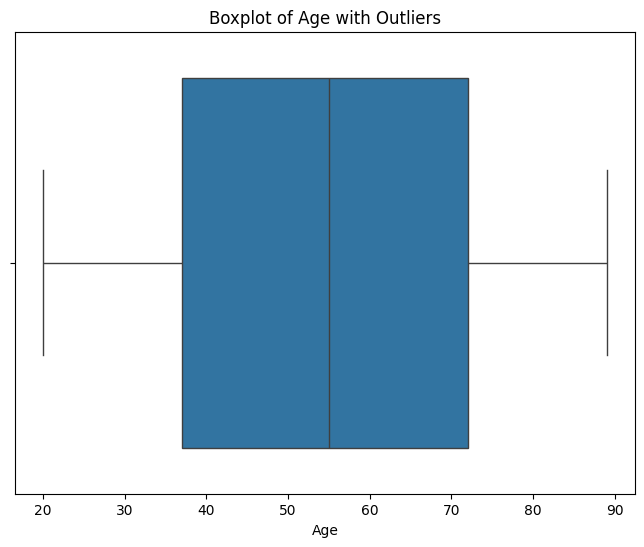

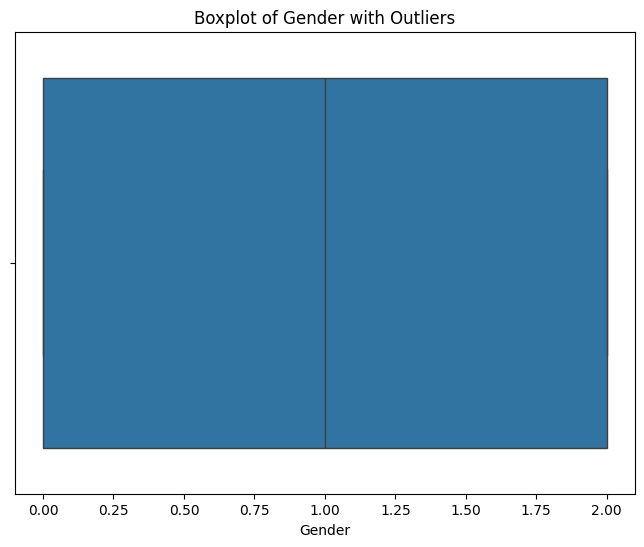

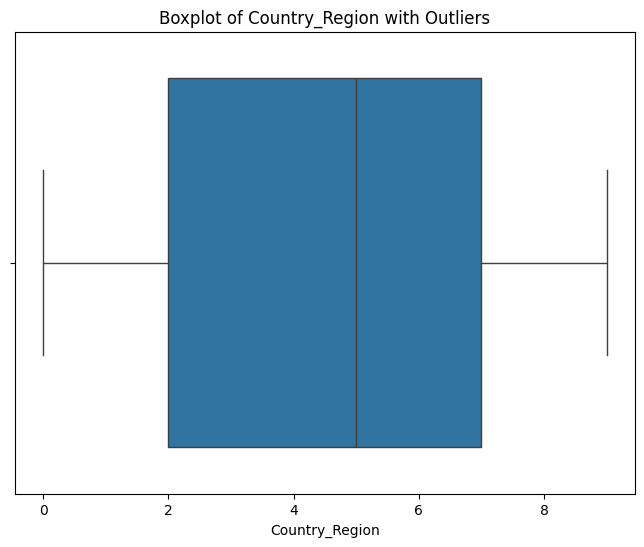

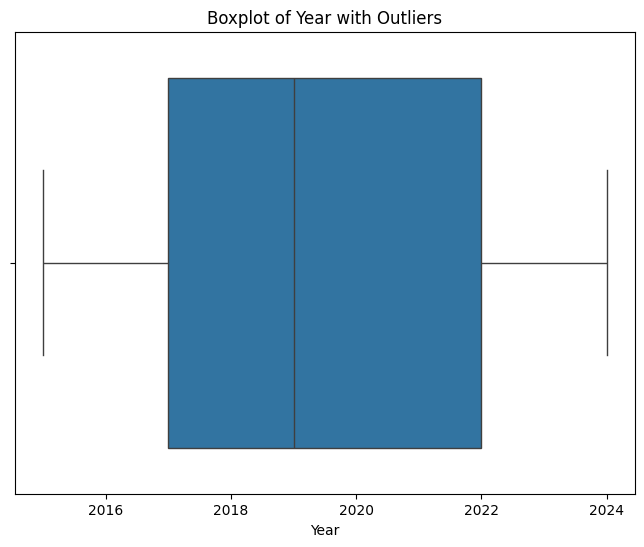

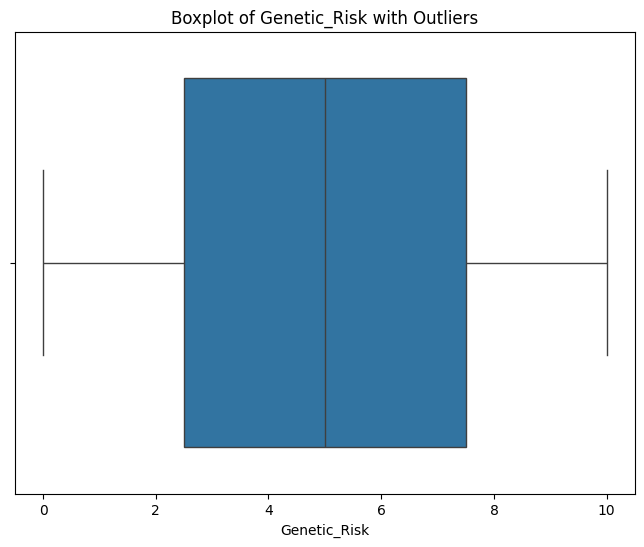

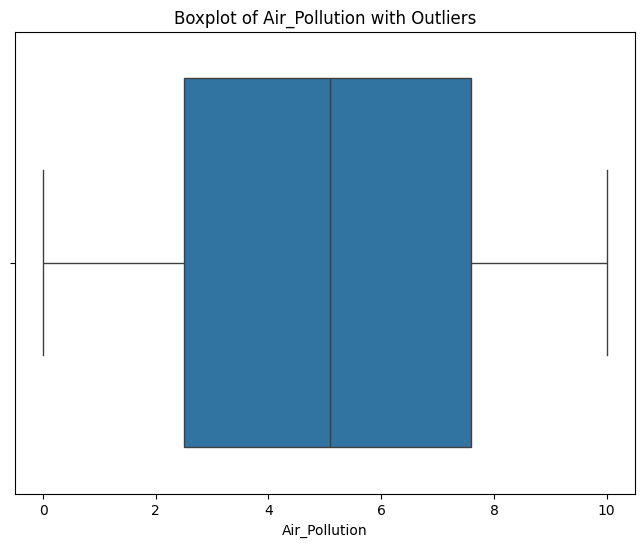

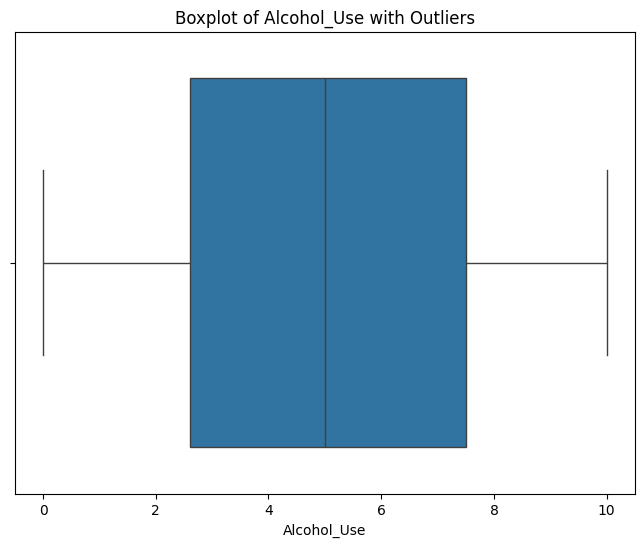

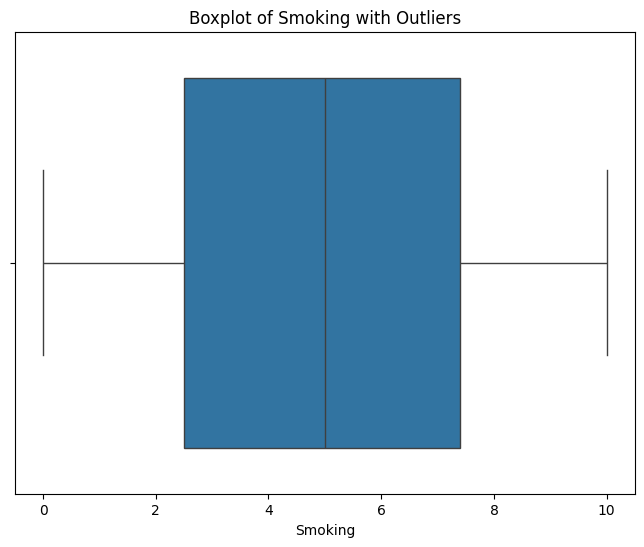

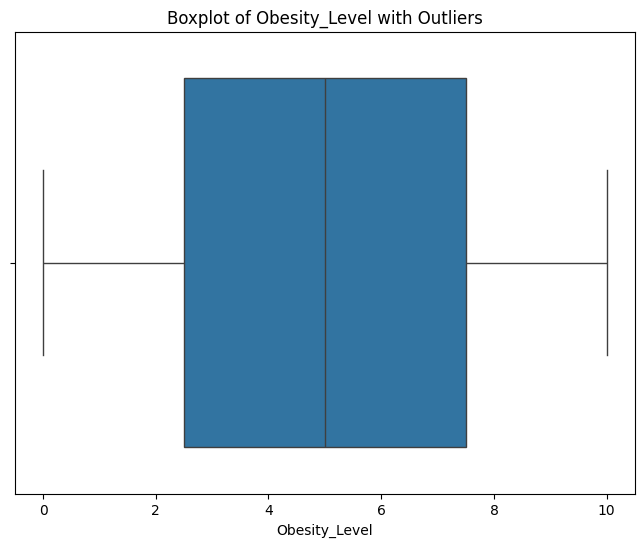

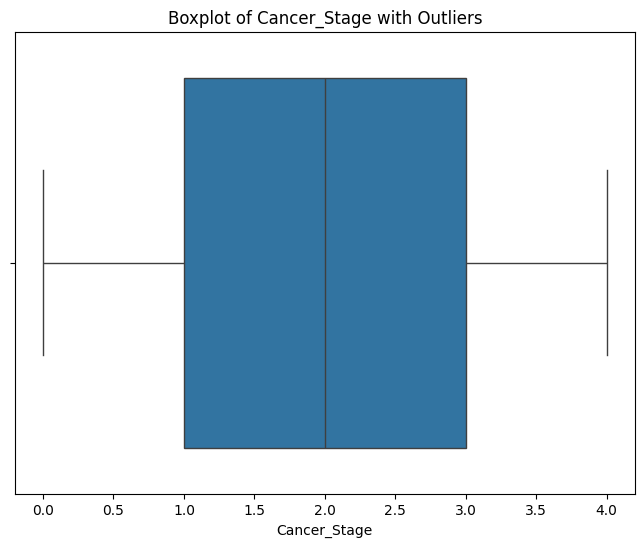

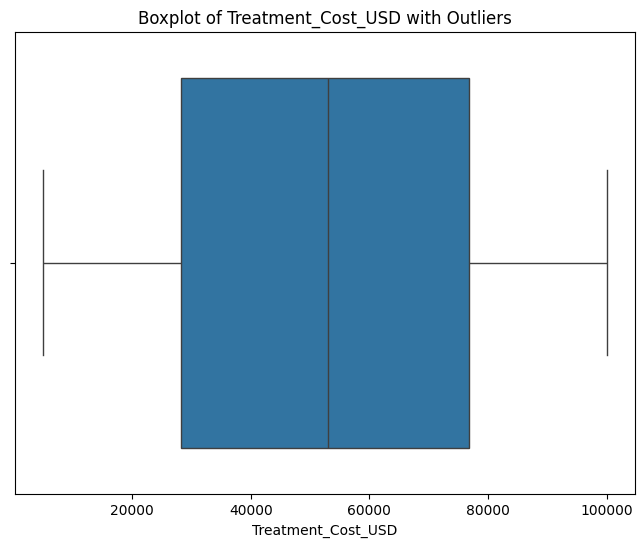

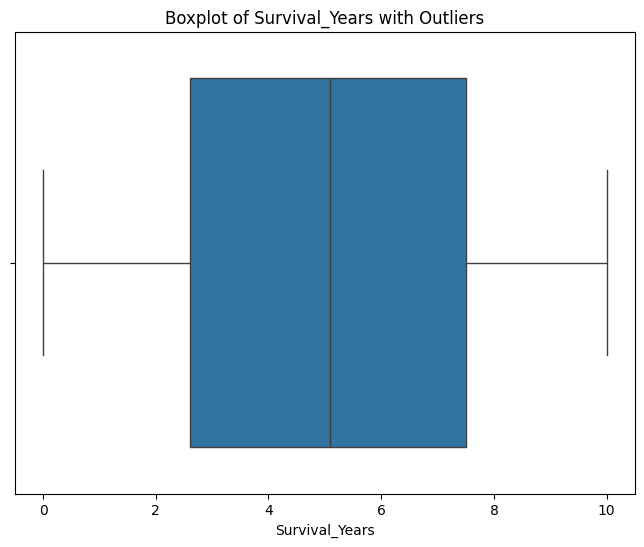

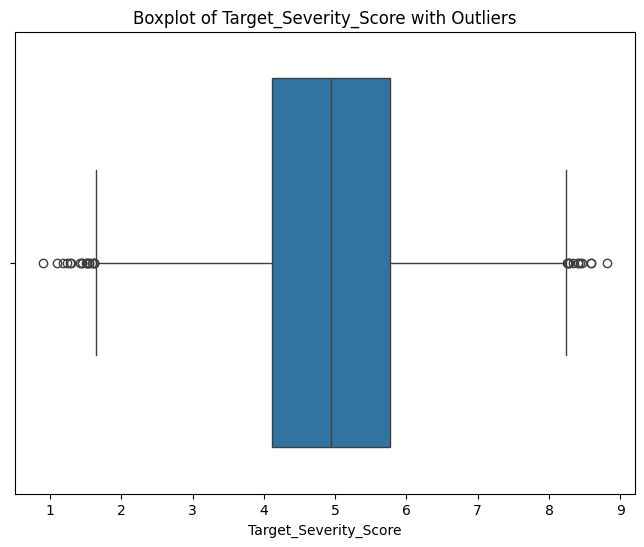

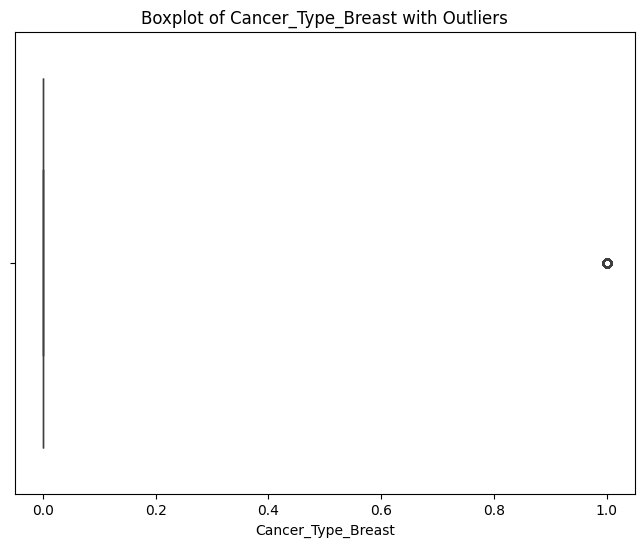

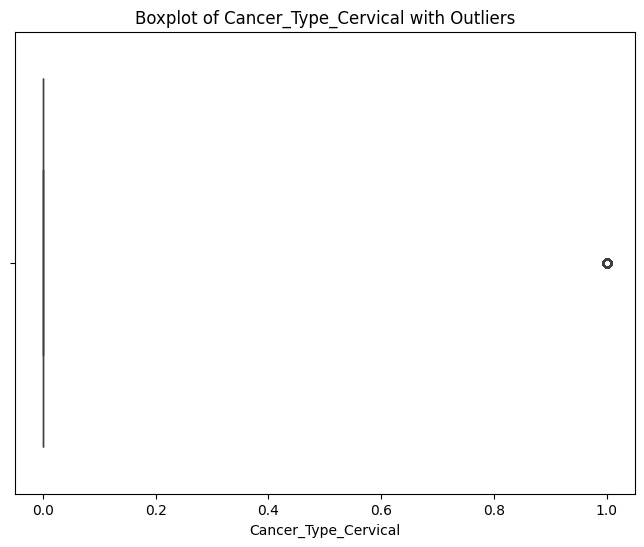

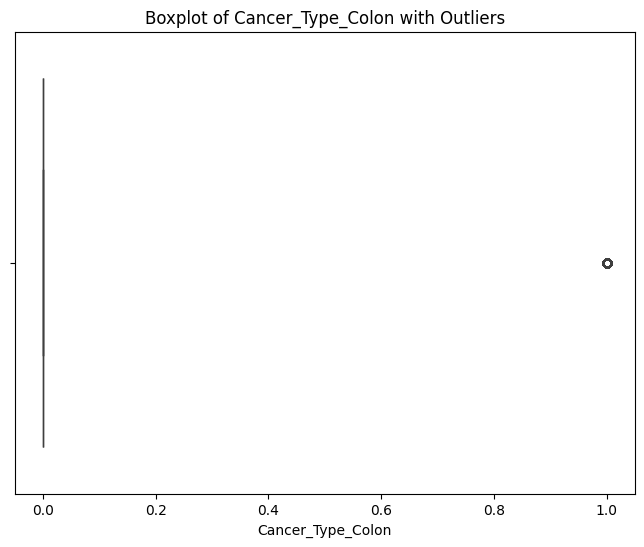

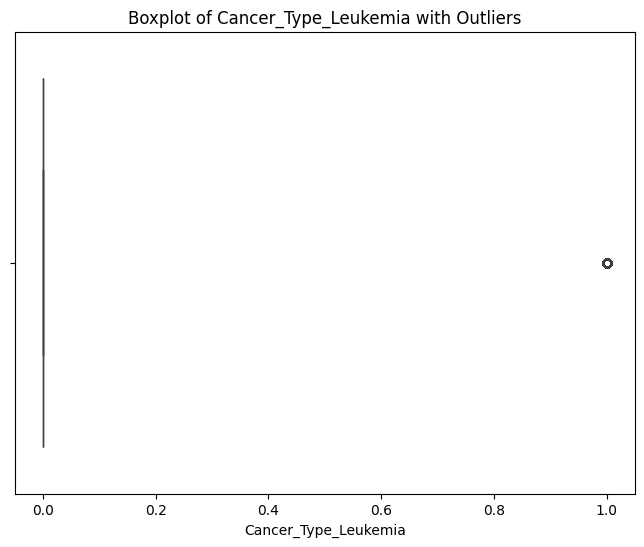

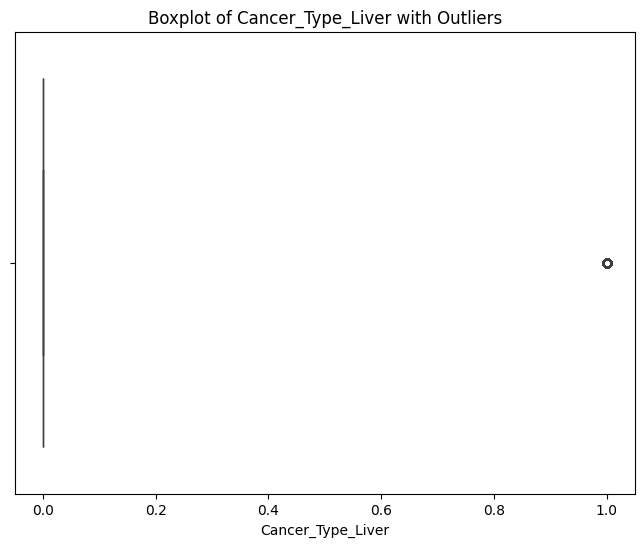

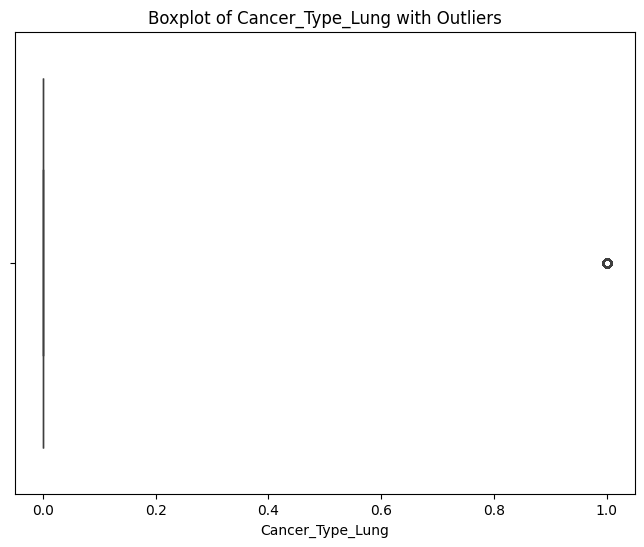

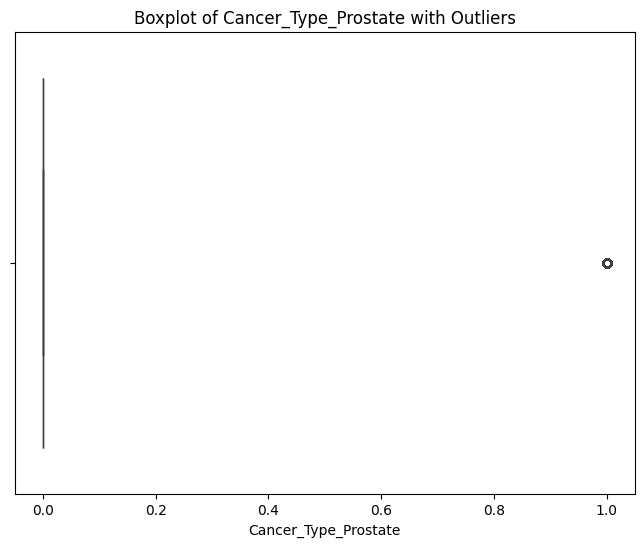

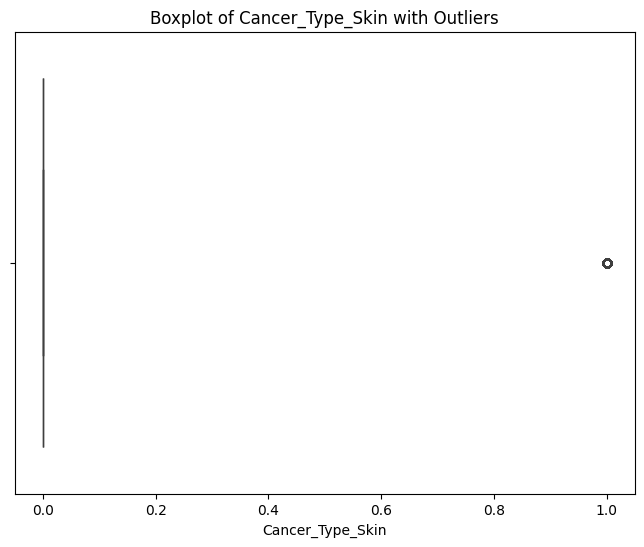

In [244]:
# # prompt: # prompt: identify if the data has outliers each one in separate graph?

# def detect_outliers_iqr(df, col):
#   """
#   Detects outliers in a DataFrame column using the IQR method and plots a boxplot.

#   Args:
#     df: pandas DataFrame.
#     col: Column name (string).
#   """
#   Q1 = df[col].quantile(0.25)
#   Q3 = df[col].quantile(0.75)
#   IQR = Q3 - Q1

#   lower_bound = Q1 - 1.5 * IQR
#   upper_bound = Q3 + 1.5 * IQR

#   outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

#   plt.figure(figsize=(8, 6))
#   sns.boxplot(x=df[col])
#   plt.title(f'Boxplot of {col} with Outliers')
#   plt.xlabel(col)
#   plt.show()

# # Iterate through numeric columns and identify outliers
# numeric_cols = modifiedDATA.select_dtypes(include=np.number).columns
# for col in numeric_cols:
#   detect_outliers_iqr(modifiedDATA.copy(), col)




In [245]:
# #The values are symmetrically distributed.
# #There’s no heavy skew, and
# #There are no dominant peaks that would drown out other value ranges.

# plt.figure(figsize=(10, 6))
# sns.histplot(DATA['Target_Severity_Score'], kde=True)
# plt.title('Distribution of Target Severity Score')
# plt.xlabel('Target Severity Score')
# plt.ylabel('Frequency')
# plt.show()

DATA['Target_Severity_Score'].describe()


In [246]:
# ## values are close to zeor means it is symmetric (well distributed)
# from scipy.stats import skew, kurtosis
# print("Skewness:", skew(DATA['Target_Severity_Score']))
# print("Kurtosis:", kurtosis(DATA['Target_Severity_Score']))


In [247]:
# ## not that much outliers
# sns.boxplot(x=DATA['Target_Severity_Score'])


In [248]:
# Q1 = DATA['Target_Severity_Score'].quantile(0.25)
# Q3 = DATA['Target_Severity_Score'].quantile(0.75)
# IQR = Q3 - Q1
# filtered = DATA[(DATA['Target_Severity_Score'] >= Q1 - 1.5 * IQR) &
#                 (DATA['Target_Severity_Score'] <= Q3 + 1.5 * IQR)]


In [249]:
# sns.boxplot(x=filtered['Target_Severity_Score'])


## Correlation Analysis